# Gaussian Process

Après avoir étudié la méthode de l’Optimal Fingerprint, nous cherchons à explorer des approches plus récentes afin d’améliorer la détection du changement climatique. Grâce aux avancées en apprentissage automatique et en statistiques bayésiennes, il est possible de développer des méthodes plus performantes et robustes pour identifier les signaux du changement climatique dans les données climatiques.  

L’objectif de ce notebook est donc de mettre en œuvre une méthode de détection du changement climatique en combinant les statistiques bayésiennes et les machines à vecteurs de support (SVMs). Cette approche vise à optimiser la séparation des données et à affiner l’analyse des tendances climatiques afin d’obtenir des résultats plus précis et plus fiables.

# Sommaire

Introduction

0. Librairies
1. Implémentation, initialisation et test de la méthode
  0. Extraction et traitement des données de simulaation
  1. Implémentation de la méthode
    1. Séparation des données
        1. De manière aléatoire
        2. Avec des processus gaussiens
          - Avec sklearn
          - Avec gpytorch
    2. Validation des hyperparamètres avec validation croisée et entrainement du modèle
    3. Test statistique fréquentiste pour la détection du changement climatique
    4. Evaluation du modèle
    5. Test bayésien pour la détection du changement climatique
    6. Application de la méthode sur les sonnées de test
    7. Mesure de la différence entre les deux différentes méthodes de séparation des données
2. Test de la méthode sur des observations
  1. Détection du changelent climatique à l'échelle mondiale
  2. Détection du changeent climatique en Europe
  Détection du changement climatique en Amérique du Nord
3. Application sur de nouvelles données (précipitations extrêmes)

Conclusion

# Introduction

Le changement climatique est un phénomène global dont la détection repose sur l'analyse rigoureuse des données climatiques. La méthode de l’Optimal Fingerprint (OF) est une approche statistique classique largement utilisée pour identifier et quantifier l’influence des activités humaines sur le climat. Cependant, avec l’évolution des techniques d’apprentissage automatique et des outils statistiques avancés, il est possible d’exploiter des méthodes plus récentes pour améliorer la détection du changement climatique.  

Dans ce travail, nous mettons en œuvre une approche combinant les statistiques bayésiennes et les machines à vecteurs de support (SVMs) pour identifier les signes du changement climatique à partir de simulations et d'observations. Cette méthode vise à optimiser la séparation des données en utilisant des techniques avancées, notamment des processus gaussiens pour une meilleure structuration des ensembles d’apprentissage et de test.  

Notre approche repose sur plusieurs étapes clés :  
- Traitement et extraction des données issues de simulations climatiques.  
- Implémentation d’un modèle intégrant des méthodes de séparation aléatoire ou guidée par des processus gaussiens.  
- Validation et entraînement du modèle à l’aide de la validation croisée et d’une sélection optimale des hyperparamètres.  
- Tests de détection du changement climatique, en utilisant à la fois des approches fréquentistes et bayésiennes.  
- Application sur des observations réelles, à différentes échelles géographiques (monde, Europe, Amérique du Nord).  
- Généralisation du modèle sur de nouvelles données, notamment les précipitations extrêmes.  

L’objectif est d’évaluer dans quelle mesure ces nouvelles méthodes permettent une détection plus robuste et précise du changement climatique par rapport aux approches traditionnelles (comme l'OF).

Les interprétation de grphiques sont à retrouver dans le rapport du projet.

## Comment on l'utilise ?

On va maintenant voir comment on va pouvoir implémenter.


1.   Séparer les données en 3 groupes (entrainement, validation et test) à l'aide des statistiques bayésiennes
2.   Déterminer les hyperparamètres du modèle vaec la cross validation
3.   Entraîner le modèle
3.   Déterminer le seuil de manière à controler l'erreur de type I (avec les données de validation)
4.   Déterminer la précision du notre nouveau modèle
5.   Evaluer et tester de variation de cettre méthode

# 0. Librairies

Les librairies que l'on va utiliser.

In [1]:
!pip install netCDF4
!pip install cftime
!pip install gpytorch
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/

In [3]:
import xarray as xr
import numpy as np
import os
import cftime
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Les fonctions de Scikit-learn dont on va avoir besoin

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

Les fonctions de GPyTorch dont on va avoir besoin

In [5]:
import torch
import gpytorch

# 1. Implémentation, initialisation et test de la méthode

## 0. Extraction et traitement des données de simulaation

Path pour l'extraction des données des simulations.

In [6]:
path = 'drive/MyDrive/projet/data'

On effectue le même traitement des données que dans la méthode de l'Optimal Fingerprint vu précédemment.

In [7]:
def reduce_granularity(ds, target_points):
    lat_points = ds.sizes['lat']
    lon_points = ds.sizes['lon']
    total_points = lat_points * lon_points
    factor = int(np.sqrt(total_points / target_points))
    factor = max(1, factor)
    ds_reduced = ds.coarsen(lat=factor, lon=factor, boundary='trim').mean()
    return ds_reduced

def traitement_data(ds, start_past, end_past, start_present, end_present, n_pt):
    data_past = ds.sel(time=slice(start_past, end_past))
    data_past = reduce_granularity(data_past, n_pt)
    seasonalities = data_past.groupby('time.month').mean('time')
    anomalies_past = data_past.groupby('time.month') - seasonalities
    anomalies_past_yearly = anomalies_past.resample(time='1YE').mean()

    data_present = ds.sel(time=slice(start_present, end_present))
    data_present = reduce_granularity(data_present, n_pt)
    anomalies_present = data_present.groupby('time.month') - seasonalities
    anomalies_present_yearly = anomalies_present.resample(time='1YE').mean()

    return anomalies_past_yearly.tas.data, anomalies_present_yearly.tas.data

Ici on va extraire les données pour les mettre deans un grand tableau en y ajoutant un label, 0 pour les données du passé (avant 1950) qui représentent des données sans changement climatique et 1 pour les données du présent (après 1950) pour lésquelles il y a un changement climatique.

In [ ]:
def create_tab(path, start_past, end_past, start_present, end_present, n_f, nb_pts):
    if n_f == 0 or n_f > 50:
        n = 50
    else:
        n = n_f

    all_data = []
    all_labels = []

    for file_name in os.listdir(path)[:n]:
        full_path = os.path.join(path, file_name)
        xarray = xr.open_dataset(full_path)

        past, present = traitement_data(xarray, start_past, end_past, start_present, end_present, nb_pts)

        time_p, lat_p, lon_p = past.shape
        past_reshaped = past.reshape((time_p, lat_p * lon_p))
        labels_past = np.zeros((time_p, 1))  # Label 0 pour le passé

        time_c, lat_c, lon_c = present.shape
        present_reshaped = present.reshape((time_c, lat_c * lon_c))
        labels_present = np.ones((time_c, 1))  # Label 1 pour le présent

        all_data.append(np.vstack((past_reshaped, present_reshaped)))
        all_labels.append(np.vstack((labels_past, labels_present)))

    all_data = np.vstack(all_data)
    all_labels = np.vstack(all_labels)

    return all_data, all_labels

In [ ]:
start_past = '1880-01-16'
end_past = '1950-01-16'

start_present = '1950-01-16'
end_present = '2022-12-16'

nb_composents = 30 # choix arbitraire
nb_pts = 1000
nb_fichiers = 50 # pour tous les fichiers

In [ ]:
data, labels = create_tab(path, start_past, end_past, start_present, end_present, nb_fichiers, nb_pts)
labels = labels.ravel()  # Convertir en vecteur 1D

## 1. Implémentation de la méthode

### 1. Séparation des données

On va chercher à séparer nos données en 3 groupes distincts:

- Les données d'entrainement qui vont permettre d'entraîner le modèle. Cela va représenter 60% de nos données.
- Les données de validation qui vont nous servir à faire la cross validation et déterminer les hyperparamètre du modèle. Cela va représenter 20% de nos données.
- Les données de tests qui vont nous permettre de quantifier la précision de notre modèle. Elles vont représenter 20% de nos données.

Pour réaliser cette séparation des données, nous allons utiliser plusieurs méthodes. La première consiste à assigner aléatoirement un groupe à chacune des données. Pour les deux suivantes on va utiliser les statistiques bayésiennes et porcessus gausiens. Pour l'une des duex on va utiliser la librairie `sklearn` alors que pour l'autre, on va utiliser la librairie `gpytorch`.


Pour la première méthode, qui sépare de manière aléatoire les données, nous allons tout simplement utiliser deux fois la fonction `train_test_split` de la librairie `sklearn`, qui permet de séparer un jeu de données en deux. Nous allons d'abord séparer les données une première fois pour obtenir les données d'entraînement, puis une seconde fois pour séparer les données de test et celles de validation.

Pour une séparation bayésienne, il va falloir suivre les étapes suivantes :

- Entraînement du Modèle GP
  
  Nous commençons par :
  - Charger et préparer les données.
  - Séparer les données en train/test de manière aléatoire dans un premier temps.
  - Initialiser un processus gaussien pour modéliser l’incertitude des données.
  - Utiliser `sklearn` avec `GaussianProcessRegressor` ou `gpytorch` pour une approche plus flexible.


- Prédiction de l’incertitude

  Avec le GP, nous pourrons prédire la variance pour l’ensemble des données et normaliser les valeurs de variance afin d'obtenir une échelle cohérente.

- Séparation des données en fonction de l’incertitude

  Les quantiles permettent de classer les données en trois groupes :
  - Entraînement : données avec la plus **faible** incertitude.
  - Validation : données avec une incertitude **moyenne**.
  - Test : données les **plus** incertaines.

  Ces ensembles sont ensuite stockés pour l'entraînement du modèle final.



#### Séparation aléatoire

Dans cette première partie, on va utiliser la méthode la plus simple qui consite tout simplment à choisir aléatoirement des points pour créer des sous groupe de taille souhaité.

In [8]:
def split_data(data, labels, test_size=0.2, val_size=0.2):
    X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=test_size + val_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (test_size + val_size), random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

#### Méthode utilisant les statistiques bayésienne et les processus gausiens

##### Approche avec sklearn

On commancer par utiliser les fonctions de sklearn qui nous permettent de rapidement appliqué notre méthode.

In [9]:
def split_data_bayes_sk(data, labels, test_size=0.2, val_size=0.2):
    X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.90, random_state=42)

    # Train Gaussian Process Model using scikit-learn
    kernel = C(1.0) * RBF(length_scale=1.0)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gp.fit(X_train, y_train)

    # Predict uncertainties
    _, uncertainty = gp.predict(data, return_std=True) # retourne la moyenne et l'ecart type
    uncertainty = np.square(uncertainty)  # Convert standard deviation to variance
    uncertainty += np.random.randn(*uncertainty.shape) * 1e-6 # ajout du bruit
    uncertainty = (uncertainty - np.min(uncertainty)) / (np.max(uncertainty) - np.min(uncertainty)) # on normalise


    # Define uncertainty thresholds
    q1 = np.quantile(uncertainty, 1 - test_size - val_size)
    q2 = np.quantile(uncertainty, 1 - test_size)

    # Split data based on uncertainty
    idx_train = np.where(uncertainty <= q1)[0]  # Low uncertainty → Train
    idx_val = np.where((uncertainty > q1) & (uncertainty <= q2))[0]  # Medium uncertainty → Validation
    idx_test = np.where(uncertainty > q2)[0]  # High uncertainty → Test
    print(f"les valeurs de q1 et q2 sont : q1 {q1} et q2 {q2}")

    X_train, y_train = data[idx_train], labels[idx_train]
    X_val, y_val = data[idx_val], labels[idx_val]
    X_test, y_test = data[idx_test], labels[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test


##### Approche en utilisant gpytorch

La méthode précédente agit comme une boite noire, on ne sait pas vraiment
comment la méthode fonctionne, c'est pourquuoi nous avons décidé d'utiliser la librairie gpytorch. Elle nous permet de mieux comprendre le comprendre le fonctionnement de notre code mais aussi d'avoir plus de contrôle sur ce qui est fait.

Explication de comment la métthode est utilisé.

Pour réaliser cette méthode, nous nous sommes aider de cette [exemple](https://docs.gpytorch.ai/en/v1.12/examples/04_Variational_and_Approximate_GPs/SVGP_Regression_CUDA.html) utilisant les processus gaussiens (SVGP).

Commençons par définir notre modèle de Gaussian Process.

Ici on va utiliser un Gaussian Process Variationnel (SVGP) et non un Gaussian Process Exact (EGP) car il est moins coûteux et parce qu'on a beaucoup de points. En effet l'EGP a un coût en *$O(N^3)$* en calcul et un coût en *$O(N^2)$* en mémoire.

In [10]:
class SVGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True)
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()) # mettre un kernel polynomial => gpytorch.kernels.PolynomialKernel(power) surement mieux et adéquation avec la SVM

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

Avec le processus gaussien initialiser juste avant, on va trouver pas à pas la variance de chaque point

In [11]:
def split_data_bayes_torch(data, labels, test_size=0.2, val_size=0.2):
    X_train, _, _, y_train, _, _ = split_data(data, labels, 0.475, 0.475)

    # Convertir les tableau numpy en tensor
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    data_tensor = torch.tensor(data, dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.float32)

    # Initialisation du modèle avec une petite partie des données
    model = SVGPModel(X_train)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()

    # Entrainement du modèle
    model.train()
    likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=data_tensor.size(0))

    max_iters = 2000
    previous_loss = float('inf')
    tolerance = 1e-3  # Critère d’arrêt

    for i in range(max_iters):
        optimizer.zero_grad()
        output = model(data_tensor)
        loss = -mll(output, labels_tensor)
        loss = loss.mean()
        loss.backward()
        optimizer.step()

        if abs(previous_loss - loss.item()) < tolerance:
            # print(f"Arrêt après {i+1} itérations, perte stabilisée à {loss.item():.4f}")
            break

        previous_loss = loss.item()

    # Prédiction de la variance sur les données
    model.eval()
    likelihood.eval()

    with torch.no_grad():
        pred = likelihood(model(data_tensor))
        uncertainty = pred.variance  # Incertitude bayésienne

    # Séparation des données
    # On a un problème, avec la prédiction on a beaucoup de fois la meme valeur donc les quantiles sont égaux donc on rajoute un léger bruit pour éviter ce problème

    noise = torch.randn_like(uncertainty) * 1e-6
    uncertainty = uncertainty + noise  # Ajouter le bruit

    # print(uncertainty)

    # Seuils pour le test et validation
    q1 = torch.quantile(uncertainty, 1 - test_size - val_size)
    q2 = torch.quantile(uncertainty, 1 - test_size)

    # print(q1, q2)

    # On va avoir les données avec le moins d'incertitudes pour le test et les données avec le plus d'incertitude pour la validation (est ce que l'on doit bien les mettre dans ce sens là?)

    idx_train = torch.where(uncertainty <= q1)[0]  # Faible incertitude -> Train
    idx_val = torch.where((uncertainty > q1) & (uncertainty <= q2))[0]  # Incertitude moyenne -> Validation
    idx_test = torch.where(uncertainty > q2)[0]  # Forte incertitude -> Test

    X_train, y_train = data[idx_train], labels[idx_train]
    X_val, y_val = data[idx_val], labels[idx_val]
    X_test, y_test = data[idx_test], labels[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

Pour la suite, nous allons utiliser cette dernière méthode pour séparer nos données car on va le voir par la suite mais elle est meilleure que la séparation aléatoire et n'est pas une boite noire comme peut l'être celle avec les fonction de `sklearn`.

### 2. Validation des hyperparamètres avec validation croisée et entrainement du modèle

[lien](https://medium.com/@prayushshrestha89/tuning-svm-hyperparameters-making-your-classifier-shine-like-a-pro-8673639ddb16) pour les hyperparamètre pour les SVM.

On choisit nos paramètres pour notre SVM tel que:

*   kernel polynomial pour essayer d'avoir la meilleur découpe
*   gamma pour pour avoir une vue d'ensemble et ne pas se concentrer sur chaque inperfection dans les données
*   C pour que le modèle accepte plus ou moins des erreurs de classification
*   degree = 3 ou 4, pas trop pour éviter l'overfitting mais assez pour avoir les bénéfices de du noyau

On cherche les meileurs paramètres gamma, C et degree pour avoir le meilleur modèle possible.

On va faire varier:
- le type de kernel
- gamma qui va prendre les valeurs 0.1, 1, 10
- C de la meme façon
- degré égal à 2, 3 ou 4

Pour être sur d'avoir les meilleurs hyperparamètres, on utilise la validation croisées

In [12]:
def model(X_train, y_train):
    param = {
        'kernel': ['poly'], # , 'rbf'
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1, 10],
        'degree': [2, 3, 4]  # Seulement pour 'poly'
    }

    svm = SVC(probability=True, random_state=42)
    grid_search = GridSearchCV(svm, param, cv=5, n_jobs=-1, scoring='accuracy')

    train_size = min(400, int(0.8 * len(X_train)))

    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=400, random_state=42, stratify=y_train)
    grid_search.fit(X_train_subset, y_train_subset.ravel())

    best_params = grid_search.best_params_

    print("Meilleurs paramètres sélectionnés :", best_params)

    best_model = grid_search.best_estimator_
    return best_model

## Etape 3: Déterminer le seuil

Ici, on ne cherche pas juste à classifier, mais à réaliser un test d’hypothèse. L’idée est de fixer un seuil alpha pour contrôler l’erreur et maximiser la puissance du test.

Avec un SVC, chaque observation Xi reçoit une probabilité d’appartenir à la classe 1. Par défaut, on prédit 1 si la probabilité dépasse 0.5, sinon 0. Mais ce seuil peut être ajusté pour mieux contrôler l’erreur de type I.

Pour ça, on peut utiliser la fonction roc_curve de sklearn afin de trouver le seuil qui garantit une erreur de type I égale à alpha. Ensuite, on devra valider ce seuil sur de nouvelles données.

In [13]:
def find_optimal_threshold(X_val, y_val, svm_model, alpha):
    y_pred_proba = svm_model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba) # erreur de type I, erreur de type II (=puissance) et seuil
    idx = np.argmin(np.abs(fpr - alpha))
    return fpr[idx], tpr[idx], thresholds[idx]

## Etape 4: Déterminer la précision de notre modèle

Pour pouvoir déterminer la précision de notre modèle, on va tout d'abord déterminer la probabilité de détecter un changement climatique. On va ensuite comparer cette probabilité avec le seuil que l'on a déterminer précédemment. Si la probabilité est supérieure au seuil alors on détecte un changement climatique. Cela permet d'allier la puissance des SVM et celle des tests statistiques. ensuite on peut comparer les valeurs prédites avec les valeurs exactes pour avoir la précision.

In [14]:
def model_accuracy(X_test, y_test, svm_model, thresholds):
    score = svm_model.decision_function(X_test)
    y_pred = (score > thresholds).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

## Etape 5: Score du modèle

Fonction qui permettent d'évaluer le modèle en retournant la précision, puissance et erreur de première espèce du test/modèle

In [15]:
def evaluate_model(X_val, y_val, X_test, y_test, alpha, svm_model):
    fpr, tpr, threshold = find_optimal_threshold(X_val, y_val, svm_model, alpha)
    accuracy = model_accuracy(X_test, y_test, svm_model, threshold)
    return fpr, tpr, accuracy

Cette fonction permet d'entraîner le modèle ainsi que de l'évaluer

In [16]:
def score_model(data, labels, alpha):
    X_train, X_val, X_test, y_train, y_val, y_test = split_data_bayes_torch(data, labels)
    svm_model = model(X_train, y_train)
    fpr, tpr, accuracy = evaluate_model(X_val, y_val, X_test, y_test, alpha, svm_model)
    return svm_model, fpr, tpr, accuracy

On commene par faire un modèle utilisant une séparation aléatoire pour l'entrainement de ces données

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, labels)
svm_model_classic = model(X_train, y_train)
fpr, tpr, threshold = find_optimal_threshold(X_val, y_val, svm_model_classic, 0.05)
accuracy = model_accuracy(X_test, y_test, svm_model_classic, threshold)

print("Avec la séparation classique")
print(f"Puissance du test: {tpr}")
print(f"Précision du modèle: {accuracy}")
print(f"Erreur de type I: {fpr}")

Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Avec la séparation classique
Puissance du test: 0.753934191702432
Précision du modèle: 0.8243055555555555
Erreur de type I: 0.05128205128205128


Et maintenant on utilise la séparation avec `gpytorch`

In [ ]:
svm_model, errI, pwr, accuracy = score_model(data, labels, 0.05)
print("Avec la séparation bayésienne")
print(f"Puissance du test: {pwr}")
print(f"Précision du modèle: {accuracy}")
print(f"Erreur de type I: {errI}")

Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Avec la séparation bayésienne
Puissance du test: 0.8440366972477065
Précision du modèle: 0.8525547445255475
Erreur de type I: 0.05263157894736842


## Test sur $\alpha$

On va tester la différence entre la séparation aléatoire et la séparation utilisant les statistiques bayésiennes et les processus gausiens

In [ ]:
list_alpha = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.3]

res_pwr = np.array([])
res_accuracy = np.array([])
res_errI = np.array([])
res_pwr_classic = np.array([])
res_accuracy_classic = np.array([])
res_errI_classic = np.array([])

X_train, X_val, X_test, y_train, y_val, y_test = split_data_bayes_torch(data, labels)
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2 = split_data(data, labels)

for alpha in list_alpha:

    fpr, tpr, accuracy = evaluate_model(X_val, y_val, X_test, y_test, alpha, svm_model)
    c_fpr, c_tpr, c_accuracy = evaluate_model(X_val2, y_val2, X_test2, y_test2, alpha, svm_model_classic)

    res_pwr = np.append(res_pwr, tpr)
    res_accuracy = np.append(res_accuracy, accuracy)
    res_errI = np.append(res_errI, fpr)

    res_pwr_classic = np.append(res_pwr_classic, c_tpr)
    res_accuracy_classic = np.append(res_accuracy_classic, c_accuracy)
    res_errI_classic = np.append(res_errI_classic, c_fpr)


In [ ]:
plt.figure(figsize=(15, 5))

# Plot de la puissance (TPR)
plt.subplot(1, 3, 1)
plt.plot(list_alpha, res_pwr, marker='o', label='Bayes')
plt.plot(list_alpha, res_pwr_classic, marker='s', label='Classique')
plt.xlabel("Alpha")
plt.ylabel("Puissance (TPR)")
plt.title("Comparaison de la puissance")
plt.legend()

# Plot de la précision (Accuracy)
plt.subplot(1, 3, 2)
plt.plot(list_alpha, res_accuracy, marker='o', label='Bayes')
plt.plot(list_alpha, res_accuracy_classic, marker='s', label='Classique')
plt.xlabel("Alpha")
plt.ylabel("Précision")
plt.title("Comparaison de la précision")
plt.legend()

# Plot de l'erreur de type I (FPR)
plt.subplot(1, 3, 3)
plt.plot(list_alpha, res_errI, marker='o', label='Bayes')
plt.plot(list_alpha, res_errI_classic, marker='s', label='Classique')
plt.xlabel("Alpha")
plt.ylabel("Erreur de Type I (FPR)")
plt.title("Comparaison de l'erreur de Type I")
plt.legend()

plt.tight_layout()
plt.show()

On observe que le modèle avec la séparation bayesienne est a une puissance du test et une précision nettement meilleure que le modèle avec la séparation classique.


## Boxplot de la puissance de test avec SVM

On veut maintenant faire un box plot de la puissance du test en entrînant le modèle à chaque fois sur 49 des 50 fichiers pour avoir une idée la moyenne de la puissance de notre test.

Dans un premier temps on va créer un tableau avec 50 cases où une case égale à 1 fichier.

In [17]:
def tab_past_present(path, start_past, end_past, start_present, end_present, n_f):
    if(n_f == 0 or n_f > 50):
        n = 50
    else:
        n = n_f

    all_data = []
    all_labels = []

    for file_name in os.listdir(path)[:n]:
        full_path = os.path.join(path, file_name)
        xarray = xr.open_dataset(full_path)

        past, present = traitement_data(xarray, start_past, end_past, start_present, end_present, nb_pts)

        time_p, lat_p, lon_p = past.shape
        past_reshaped = past.reshape((time_p, lat_p * lon_p))
        labels_past = np.zeros((time_p, 1))  # Label 0 pour le passé

        time_c, lat_c, lon_c = present.shape
        present_reshaped = present.reshape((time_c, lat_c * lon_c))
        labels_present = np.ones((time_c, 1))  # Label 1 pour le présent

        all_data.append(np.vstack((past_reshaped, present_reshaped)))
        all_labels.append(np.vstack((labels_past, labels_present)))

    return all_data, all_labels

On veux maintenant déterminer l'erreur de type I, la puissance et la précision de notre modèle comme expliqué au dessus.

In [18]:
def calc_type_I_power_accuracy(data, labels, alpha):
    s = stats.norm.ppf(1 - alpha)
    list_err_I, list_power, list_accuracy = [], [], []
    for i in range(len(data)):
        print(f"fichier de test: {i + 1} sur {len(data)}")
        train_data, train_labels = [], []
        for j in range(len(data)):
            if(i != j):
                train_data.append(data[j])
                train_labels.append(labels[j])
            else:
                test_data = data[j]
                test_labels = labels[j]

        train_data = np.array(train_data)
        train_labels = np.array(train_labels)

        test_data = np.array(test_data)
        test_labels = np.array(test_labels)

        train_data = train_data.reshape(train_data.shape[0] * train_data.shape[1], train_data.shape[2])
        train_labels = train_labels.reshape(train_labels.shape[0] * train_labels.shape[1], 1)

        for i in range(2):
            X_train, X_val, X_test, y_train, y_val, y_test = split_data(train_data, train_labels, test_size=0.01, val_size=0.2)
            svm_model_test = model(X_train, y_train)
            errI, pwr, threshold = find_optimal_threshold(X_val, y_val, svm_model_test, 0.05)
            accuracy = model_accuracy(test_data, test_labels, svm_model_test, threshold)
            list_err_I.append(errI)
            list_power.append(pwr)
            list_accuracy.append(accuracy)

    return list_err_I, list_power, list_accuracy

On peut maintenant appliquer nos fonctions.

In [ ]:
data, labels = tab_past_present(path, start_past, end_past, start_present, end_present, 50)

In [ ]:
list_err_I, list_power, list_accuracy = calc_type_I_power_accuracy(data, labels, 0.05)

fichier de test: 1 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 2 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 3 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 4 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma':

{'whiskers': [<matplotlib.lines.Line2D at 0x7888f0fcdad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7888efbc9350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7888f0fcde10>],
 'medians': [<matplotlib.lines.Line2D at 0x7888efb24e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7888efb25450>],
 'means': []}

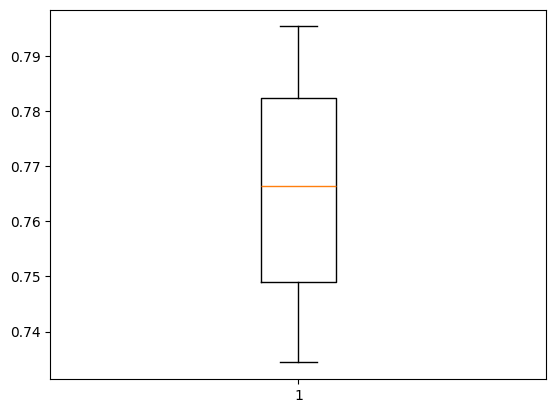

In [ ]:
plt.boxplot(list_power)

{'whiskers': [<matplotlib.lines.Line2D at 0x7888e7355410>,
 'caps': [<matplotlib.lines.Line2D at 0x7888e7356890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7888e7354b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7888e7357e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7888e7370750>],
 'means': []}

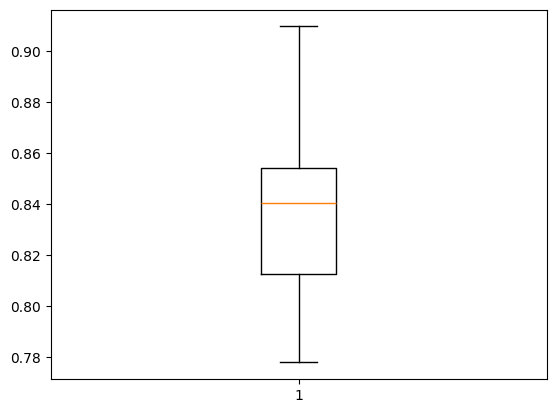

In [ ]:
plt.boxplot(list_accuracy)

On obtient une très bonne précision et puissance pour ces modèles ce qui implique que les résultats vont être fiables et robustes

# Test sur les observations

## Extraction des données d'observation

Path pour l'extraction des données d'observation.

In [ ]:
path_obs = 'drive/MyDrive/projet/data_observation_ERA5'
file_name = "ERA5_1940-2024_Monthly_TAS.nc"

On commence par extraire et trater nos données d'observation.

In [ ]:
obs = xr.open_dataset(path_obs + '/' + file_name)
print(f"Processing file: {file_name}")

On convertie la date dans le format souhaité.

In [ ]:
obs['date'] = pd.to_datetime(obs['date'], format='%Y%m%d') # convertion de la date

On réduit la dimension des données.

In [ ]:
def reduce_granularity_obs(ds, target_points):
    lat_points = ds.sizes['latitude']
    lon_points = ds.sizes['longitude']
    total_points = lat_points * lon_points
    factor = int(np.sqrt(total_points / target_points))
    ds_reduced = ds.coarsen(latitude=factor, longitude=factor, boundary='trim').mean()
    return ds_reduced

In [ ]:
obs = reduce_granularity_obs(obs, np.shape(data)[1])

On calcul la saisonalité.

In [ ]:
print(obs['date'].isel(date=120))

In [ ]:
data_past = obs.isel(date=slice(0, 120)) # on choisit les 50 premières dates pour représenter le passé

seasonalities = data_past.groupby('date.month').mean("date")

anomalies_obs = obs.groupby('date.month') - seasonalities
anomalies_obs = anomalies_obs.resample(date='1YE').mean()

On réduit la dimension.

In [ ]:
date, longitude, latitude = anomalies_obs.sizes['date'], anomalies_obs.sizes['longitude'], anomalies_obs.sizes['latitude']
anomalies_obs = np.array(anomalies_obs.to_dataarray())
anomalies_obs = anomalies_obs.reshape(date, longitude * latitude)

En faire une fonction (pas sur qu'elle soit vraiment utile)

In [ ]:
def traitement_data_obs(path_obs, file_mane, start_past, end_past, start_present, end_present, n_pt):
    obs = xr.open_dataset(path_obs + '/' + file_name)
    print(f"Processing file: {file_name}")

    obs['date'] = pd.to_datetime(obs['date'], format='%Y%m%d') # convertion de la date

    obs = reduce_granularity_obs(obs, n_pt)

    data_past = obs.isel(date=slice(0, 120)) # on choisit les 50 premières dates pour représenter le passé

    seasonalities = data_past.groupby('date.month').mean("date")

    anomalies_obs = obs.groupby('date.month') - seasonalities
    anomalies_obs = anomalies_obs.resample(date='1YE').mean()

    date, longitude, latitude = anomalies_obs.sizes['date'], anomalies_obs.sizes['longitude'], anomalies_obs.sizes['latitude']
    anomalies_obs = np.array(anomalies_obs.to_dataarray())
    anomalies_obs = anomalies_obs.reshape(date, longitude * latitude)

    return anomalies_obs

In [ ]:
anomalies_obs = traitement_data_obs(path_obs, file_name, start_past, end_past, start_present, end_present, np.shape(data)[1])

## Application du modèle sur les observations

On donne nos données d'observation au modèle que l'on a entrainé pour qu'il nous retour si il y a un changement climatique ou non pour chacune des années.

In [ ]:
X_obs = anomalies_obs
y_obs = svm_model.predict(X_obs)

In [ ]:
val = np.arange(1940, 1940 + 85, 1)
plt.plot(val, y_obs, 'o')
plt.xlabel('Année')
plt.ylabel('Label (1 = Chgt climatique)')
plt.title('Graphique de la détection du changement climatique en fonction des années grace au svm non linéaire')
plt.show()

## Sur une partie du monde

Avec cette fonction, on va pouvoir séléctionner uniquement les données dans une région spécifique (dans le carré délimiter par deux valeurs de latitudes et longitudes).

Pas exemple, pour l'Amérique du nord, l'encadrement ce fait avec 15°N et 73°N pour la latitude et 188°E et 308°E pour la longitude

Cette fonction permet d'extraire les données pour une seule région du monde

In [ ]:
def create_tab_region(path, start_past, end_past, start_present, end_present, n_f, nb_pts, lat_min, lat_max, long_min, long_max):
    if n_f == 0 or n_f > 50:
        n = 50
    else:
        n = n_f

    all_data = []
    all_labels = []

    for file_name in os.listdir(path)[:n]:
        full_path = os.path.join(path, file_name)
        xarray = xr.open_dataset(full_path)

        # xarray = xarray.sel(lat=slice(lat_min, lat_max), lon=slice(long_min, long_max)) # ne fonctionne pas pour la latitude

        xarray = xarray.where((xarray.lat >= lat_min) & (xarray.lat <= lat_max) &
                          (xarray.lon >= long_min) & (xarray.lon <= long_max),
                          drop=True)

        past, present = traitement_data(xarray, start_past, end_past, start_present, end_present, nb_pts)

        time_p, lat_p, lon_p = past.shape
        past_reshaped = past.reshape((time_p, lat_p * lon_p))
        labels_past = np.zeros((time_p, 1))  # Label 0 pour le passé

        time_c, lat_c, lon_c = present.shape
        present_reshaped = present.reshape((time_c, lat_c * lon_c))
        labels_present = np.ones((time_c, 1))  # Label 1 pour le présent

        all_data.append(np.vstack((past_reshaped, present_reshaped)))
        all_labels.append(np.vstack((labels_past, labels_present)))

    all_data = np.vstack(all_data)
    all_labels = np.vstack(all_labels)

    return all_data, all_labels

Nouvelle fonction pour réduire la granularité

In [ ]:
def reduce_granularity_obs2(ds, target_points):
    lat_points = ds.sizes['latitude']
    lon_points = ds.sizes['longitude']

    # Ratio original de la grille
    aspect_ratio = lat_points / lon_points

    # Trouver la meilleure approximation de (lat_out, lon_out)
    lat_out = int(round(np.sqrt(target_points * aspect_ratio)))
    lon_out = int(round(target_points / lat_out))

    # Vérification finale
    if lat_out * lon_out != target_points:
        print(f"Impossible d'avoir exactement {target_points} points, ajustement à {lat_out * lon_out}.")

    # Assurer que les valeurs interpolées restent bien dans l'encadrement d'origine
    print(f"Latitude min: {ds.latitude.values.min()}, Latitude max: {ds.latitude.values.max()}")
    print(f"Longitude min: {ds.longitude.values.min()}, Longitude max: {ds.longitude.values.max()}")

    new_lat = np.linspace(ds.latitude.values.min(), ds.latitude.values.max(), lat_out, endpoint=True)
    new_lon = np.linspace(ds.longitude.values.min(), ds.longitude.values.max(), lon_out, endpoint=True)

    # Interpolation
    ds_reduced = ds.interp(latitude=new_lat, longitude=new_lon, method="linear")

    return ds_reduced

Fonction pour afficher le zoom sur la région du monde que l'on veut étudier

In [ ]:
def plot_anomalies(anomalies_obs, latitudes, longitudes, date_index=-1, zoom_extent=None):
    # Vérification des dimensions pour éviter les erreurs de reshape
    if anomalies_obs.shape[1] != len(latitudes) or anomalies_obs.shape[2] != len(longitudes):
        raise ValueError("Les dimensions des anomalies ne correspondent pas aux latitudes et longitudes fournies.")

    # Extraire la carte des anomalies pour la date spécifiée
    anomalies_map = anomalies_obs[date_index]

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))

    # Convertion des latitudes
    latitudes = np.where(latitudes > 90, latitudes - 180, latitudes)

    # Vérification avant de définir l'extension
    if np.isinf(longitudes.min()) or np.isinf(longitudes.max()) or np.isinf(latitudes.min()) or np.isinf(latitudes.max()):
        raise ValueError("Erreur : Les coordonnées contiennent des valeurs infinies.")

    # Définir l'étendue de la carte
    if zoom_extent:
        ax.set_extent(zoom_extent, crs=ccrs.PlateCarree())
    else:
        ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], crs=ccrs.PlateCarree())


    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Afficher les anomalies avec un colormap
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
    im = ax.pcolormesh(lon_grid, lat_grid, anomalies_map, transform=ccrs.PlateCarree(), cmap='coolwarm')


    # Ajouter une barre de couleur
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
    cbar.set_label('Anomalies')

    plt.title(f'Carte des Anomalies - Date index {date_index}')
    plt.show()

On convertie ici le format des date pour les observations

In [ ]:
obs = xr.open_dataset(path_obs + '/' + file_name)
print(f"Processing file: {file_name}")

obs['date'] = pd.to_datetime(obs['date'], format='%Y%m%d') # convertion de la date

### Pour l'Amérique du Nord

On sélectionne la la bonne région et on entraine notre modèle du modèle

In [ ]:
data_AM, labels_AM = create_tab_region(path, start_past, end_past, start_present, end_present, nb_fichiers, 750, 15, 73, 188, 308)
labels_AM = labels_AM.ravel()

In [ ]:
svm_model_AM, errI, power_AM, accuracy = score_model(data_AM, labels_AM, 0.05)
print(f"Puissance du test AM: {power_AM}")

On s'occupe maintenant des observations

In [ ]:
obs_AM = obs.where((obs.latitude >= 15) & (obs.latitude <= 73) &
                          (obs.longitude >= 188) & (obs.longitude <= 308),
                          drop=True)

print(f"Latitude min: {obs_AM.latitude.values.min()}, Latitude max: {obs_AM.latitude.values.max()}")
print(f"Longitude min: {obs_AM.longitude.values.min()}, Longitude max: {obs_AM.longitude.values.max()}")

obs_AM = reduce_granularity_obs2(obs_AM, np.shape(data_AM)[1])

data_past = obs_AM.isel(date=slice(0, 120)) # on choisit les 50 premières dates pour représenter le passé

seasonalities = data_past.groupby('date.month').mean("date")

anomalies_obs = obs_AM.groupby('date.month') - seasonalities
anomalies_obs = anomalies_obs.resample(date='1YE').mean()

anomalie_AM_map = anomalies_obs
longitudes_AM, latitudes_AM = anomalie_AM_map.coords['longitude'].values, anomalie_AM_map.coords['latitude'].values

date, longitude, latitude = anomalies_obs.sizes['date'], anomalies_obs.sizes['longitude'], anomalies_obs.sizes['latitude']
anomalies_obs = np.array(anomalies_obs.to_dataarray())
anomalies_obs_AM = anomalies_obs.reshape(date, longitude * latitude)

print(np.shape(anomalies_obs_AM), np.shape(data_AM)[1])

On affiche la carte des anomalies en Amérique du Nord

Cela nous permet de vérifier si on a bien sélectionné la bonne partie du monde

In [ ]:
anomalies_obs_AM = anomalies_obs_AM.reshape(anomalies_obs_AM.shape[0], latitudes_AM.size, longitudes_AM.size)
plot_anomalies(anomalies_obs_AM, latitudes_AM, longitudes_AM)

On passe maintenant aux résultat avec la méthode combinant les SVM et les tests statistiques fréquentistes

In [ ]:
anomalies_obs_AM = anomalies_obs_AM.reshape(anomalies_obs_AM.shape[0], latitudes_AM.size * longitudes_AM.size)
X_obs_AM = anomalies_obs_AM
y_obs_AM = svm_model_AM.predict(X_obs_AM)

In [ ]:
val = np.arange(1940, 1940 + 85, 1)
plt.plot(val, y_obs_AM, 'o')
plt.xlabel('Année')
plt.ylabel('Label (1 = Chgt climatique)')
plt.title('Graphique de la détection du changement climatique en fonction des années grace au svm non linéaire en Amérique du Nord')
plt.show()

### Pour l'Europe

Extraction des données de simulations

In [ ]:
data_EU, labels_EU = create_tab_region(path, start_past, end_past, start_present, end_present, nb_fichiers, 750, 36, 71, 0, 60)
labels_EU = labels_EU.ravel()

Entraînement du modèle

In [ ]:
svm_model_EU, errI, power_EU, accuracy = score_model(data_EU, labels_EU, 0.05)
print(f"Puissance du test EU: {power_EU}")

Extraction et traitement des données d'observation

In [ ]:
obs_EU = obs.where((obs.longitude >= 0) & (obs.longitude <= 60) &
                   (obs.latitude >= 36) & (obs.latitude <= 71), drop=True)

print(f"Latitude min: {obs_EU.latitude.values.min()}, Latitude max: {obs_EU.latitude.values.max()}")
print(f"Longitude min: {obs_EU.longitude.values.min()}, Longitude max: {obs_EU.longitude.values.max()}")

obs_EU = reduce_granularity_obs2(obs_EU, np.shape(data_EU)[1])

data_past = obs_EU.isel(date=slice(0, 120)) # on choisit les 50 premières dates pour représenter le passé

seasonalities = data_past.groupby('date.month').mean("date")

anomalies_obs = obs_EU.groupby('date.month') - seasonalities
anomalies_obs = anomalies_obs.resample(date='1YE').mean()

anomalie_EU_map = obs_EU
longitudes_EU, latitudes_EU = anomalie_EU_map.coords['longitude'].values, anomalie_EU_map.coords['latitude'].values

date, longitude, latitude = anomalies_obs.sizes['date'], anomalies_obs.sizes['longitude'], anomalies_obs.sizes['latitude']
anomalies_obs = np.array(anomalies_obs.to_dataarray())
anomalies_obs_EU = anomalies_obs.reshape(date, longitude * latitude)

print(np.shape(anomalies_obs_EU), np.shape(data_EU)[1])

Affichage de la carte

In [ ]:
anomalies_obs_EU = anomalies_obs_EU.reshape(anomalies_obs_EU.shape[0], latitudes_EU.size, longitudes_EU.size)
plot_anomalies(anomalies_obs_EU, latitudes_EU, longitudes_EU)

Test sur les observations

In [ ]:
anomalies_obs_EU = anomalies_obs_EU.reshape(anomalies_obs_EU.shape[0], latitudes_EU.size * longitudes_EU.size)

In [ ]:
X_obs_EU = anomalies_obs_EU
y_obs_EU = svm_model_EU.predict(X_obs_EU)

In [ ]:
val = np.arange(1940, 1940 + 85, 1)
plt.plot(val, y_obs_EU, 'o')
plt.xlabel('Année')
plt.ylabel('Label (1 = Chgt climatique)')
plt.title('Graphique de la détection du changement climatique en fonction des années grace au svm non linéaire en Europe')
plt.show()

## Test bayésien

On va devoir calculer les Facteur de Bayes en utilisant les données que l'on utilise pour calculer une statistique. Une fois que le modèle de Gaussian Process est entraîné, on obtient une distribution postérieur pour chaque nouveau X=x que vous voulez tester, i.e. une probabilité que Y=1 (changement climatique) et une autre pour Y=0 (pas de changement climatique), notons respectivement P(Y=1|X=x) et P(Y=0|X=x).


On peux ensuite calculer le facteur de bayes en prenant le ratio de ces deux probabilités, i.e. FB = P(Y=1|X=x)/P(Y=0|X=x). Pour interpréter le facteur de Bayes on va utiliser l'échelle proposé par Jeffreys.

1. Estimation des probabilités issues du modèle SVM

2.  Apprentissage du processus gaussienUn processus gaussien (GP) est ensuite entraîné sur ces probabilités afin de modéliser leur distribution et d’estimer l’incertitude associée aux prédictions.Pour entraîner le processus gaussien

3. Calcul du facteur de Bayes

4. Interprétation avec l’échelle de Jeffreys

Calcul du facteur de Bayes

In [ ]:
def facteur_bayesien(data, labels, svm_model):
    X_train, X_val, X_test, y_train, y_val, y_test = split_data_bayes_torch(data, labels)

    svm_proba = svm_model.predict_proba(X_test)
    svm_proba_feature = svm_proba[:, 1].reshape(-1, 1)

    kernel = 1.0 * RBF(length_scale=1.0)  # RBF Kernel pour GPC
    gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
    gpc.fit(svm_proba_feature, y_test)

    FB = gpc.predict_proba(svm_proba_feature)[:, 1] / gpc.predict_proba(svm_proba_feature)[:, 0]

    return FB, y_test, X_test, gpc

Interprétation du facteur de Bayes avec l'échelle de Jeffreys

In [ ]:
def test_bayesien(data, labels, svm_model):
    FB, y_test, X_test, gpc = facteur_bayesien(data, labels, svm_model)

    predictions = (FB > 1).astype(int)

    bayes_scores = np.zeros_like(FB)

    bayes_scores[FB < 1] = 0                   # Preuve contre le changement climatique
    bayes_scores[(FB >= 1) & (FB < 3)] = 1     # Évidence faible
    bayes_scores[(FB >= 3) & (FB < 10)] = 2    # Preuve modérée
    bayes_scores[(FB >= 10) & (FB < 30)] = 3   # Preuve forte
    bayes_scores[(FB >= 30) & (FB < 100)] = 4  # Preuve très forte
    bayes_scores[FB >= 100] = 5                # Preuve décisive

    return bayes_scores, predictions, y_test, X_test, gpc

Fonction pour obtenir la prédiction du changement climatique sur les observations

In [ ]:
def predict_observation(svm_model, gpc, X_obs):

    # Prédire avec SVM
    svm_probs = svm_model.predict_proba(X_obs)
    svm_probs_feature = svm_probs[:, 1].reshape(-1, 1)

    # Prédire avec GPC
    gpc_probs = gpc.predict_proba(svm_probs_feature)

    # Calculer le facteur de Bayes
    FB = gpc_probs[:, 1] / gpc_probs[:, 0]

    # Interpréter selon l'échelle de Jeffreys
    bayes_scores = np.zeros_like(FB)
    bayes_scores[FB < 1] = 0
    bayes_scores[(FB >= 1) & (FB < 3)] = 1
    bayes_scores[(FB >= 3) & (FB < 10)] = 2
    bayes_scores[(FB >= 10) & (FB < 30)] = 3
    bayes_scores[(FB >= 30) & (FB < 100)] = 4
    bayes_scores[FB >= 100] = 5

    return FB, bayes_scores

Pour le monde

In [ ]:
bayes_scores, predictions, y_true, X_test, gpc = test_bayesien(data, labels, svm_model)

accuracy = accuracy_score(y_true, predictions)
print(f"Précision: {accuracy:.4f}")

for i, label in enumerate(["Preuve contre", "Évidence faible", "Preuve modérée",
                          "Preuve forte", "Preuve très forte", "Preuve décisive"]):
    count = np.sum(bayes_scores == i)
    percentage = (count / len(bayes_scores)) * 100
    print(f"{label}: {count} cas ({percentage:.2f}%)")

FB_obs, score_obs = predict_observation(svm_model, gpc, X_obs)

In [ ]:
val = np.arange(1940, 1940 + 85, 1)
plt.plot(val, score_obs, 'o')
plt.xlabel('Année')
plt.ylabel('Échelle de Jeffreys')
plt.title('Graphique de la détection du changement climatique en fonction des années grace au svm non linéaire et à un test bayesien')
plt.show()

Pour l'Amérique du Nord

In [ ]:
bayes_scores, predictions, y_true, X_test, gpc = test_bayesien(data_AM, labels_AM, svm_model_AM)

accuracy = accuracy_score(y_true, predictions)
print(f"Précision: {accuracy:.4f}")

for i, label in enumerate(["Preuve contre", "Évidence faible", "Preuve modérée",
                          "Preuve forte", "Preuve très forte", "Preuve décisive"]):
    count = np.sum(bayes_scores == i)
    percentage = (count / len(bayes_scores)) * 100
    print(f"{label}: {count} cas ({percentage:.2f}%)")

FB_obs, score_obs = predict_observation(svm_model_AM, gpc, X_obs_AM)

In [ ]:
val = np.arange(1940, 1940 + 85, 1)
plt.plot(val, score_obs, 'o')
plt.xlabel('Année')
plt.ylabel('Échelle de Jeffreys')
plt.title('Graphique de la détection du changement climatique en fonction des années en Amérique du Nord grace au svm non linéaire et à un test bayesien')
plt.show()

Pour l'Europe

In [ ]:
bayes_scores, predictions, y_true, X_test, gpc = test_bayesien(data_EU, labels_EU, svm_model_EU)

accuracy = accuracy_score(y_true, predictions)
print(f"Précision: {accuracy:.4f}")

for i, label in enumerate(["Preuve contre", "Évidence faible", "Preuve modérée",
                          "Preuve forte", "Preuve très forte", "Preuve décisive"]):
    count = np.sum(bayes_scores == i)
    percentage = (count / len(bayes_scores)) * 100
    print(f"{label}: {count} cas ({percentage:.2f}%)")

FB_obs, score_obs = predict_observation(svm_model_EU, gpc, X_obs_EU)

In [ ]:
val = np.arange(1940, 1940 + 85, 1)
plt.plot(val, score_obs, 'o')
plt.xlabel('Année')
plt.ylabel('Échelle de Jeffreys')
plt.title('Graphique de la détection du changement climatique en fonction des années en Europe grace au svm non linéaire et à un test bayesien')
plt.show()

## Test sur les valeurs extrêmes

Dans ce nouveau cas, nous allons étudier des données de maximum mensuel des précipitations journalières moyenne

extraire les données, les mettres dans le bon format, faire le traitement (calcul des anomalies), séparation des données, entrainement du modèle, validation/test du modèle et application du modèle

In [19]:
path_max_precipitation = 'drive/MyDrive/projet/Data_precip_CESM2'

In [20]:
def reduce_granularity_MP(ds, target_points):
    lat_points = ds.sizes['lat']
    lon_points = ds.sizes['lon']
    total_points = lat_points * lon_points
    factor = int(np.sqrt(total_points / target_points))
    factor = max(1, factor)
    ds_reduced = ds.coarsen(lat=factor, lon=factor, boundary='trim').mean()
    return ds_reduced

def traitement_data_MP(ds, start_past, end_past, start_present, end_present, n_pt):
    data_past = ds.sel(time=slice(start_past, end_past))
    data_past = reduce_granularity_MP(data_past, n_pt)
    seasonalities = data_past.groupby('time.month').mean('time')
    anomalies_past = data_past.groupby('time.month') - seasonalities
    anomalies_past_yearly = anomalies_past.resample(time='1YE').mean()

    data_present = ds.sel(time=slice(start_present, end_present))
    data_present = reduce_granularity_MP(data_present, n_pt)
    anomalies_present = data_present.groupby('time.month') - seasonalities
    anomalies_present_yearly = anomalies_present.resample(time='1YE').mean()

    return anomalies_past_yearly.pr.data, anomalies_present_yearly.pr.data

In [21]:
def create_tab_MP(path, start_past, end_past, start_present, end_present, n_f, nb_pts):
    if n_f == 0 or n_f > 50:
        n = 50
    else:
        n = n_f

    all_data = []
    all_labels = []

    for file_name in os.listdir(path_max_precipitation)[:50]: # puis passer à 50
        full_path = os.path.join(path, file_name)
        xarray = xr.open_dataset(full_path)

        xarray = xarray.sel(time=slice(start_past, end_present))

        past, present = traitement_data_MP(xarray, start_past, end_past, start_present, end_present, nb_pts)

        time_p, lat_p, lon_p = past.shape
        past_reshaped = past.reshape((time_p, lat_p * lon_p))
        labels_past = np.zeros((time_p, 1))  # Label 0 pour le passé

        time_c, lat_c, lon_c = present.shape
        present_reshaped = present.reshape((time_c, lat_c * lon_c))
        labels_present = np.ones((time_c, 1))  # Label 1 pour le présent

        all_data.append(np.vstack((past_reshaped, present_reshaped)))
        all_labels.append(np.vstack((labels_past, labels_present)))

    all_data = np.vstack(all_data)
    all_labels = np.vstack(all_labels)

    return all_data, all_labels

In [22]:
start_past = '1880-01-16'
end_past = '1950-01-16'

start_present = '1950-01-16'
end_present = '2022-12-16'

nb_pts = 1000
nb_fichiers = 50 # pour tous les fichiers

data_MP, labels_MP = create_tab_MP(path_max_precipitation, start_past, end_past, start_present, end_present, nb_fichiers, nb_pts)

In [23]:
svm_model_MP, errI, pwr, accuracy = score_model(data_MP, labels_MP, 0.05)

print(f"Puissance du test: {pwr}")
print(f"Précision du modèle: {accuracy}")
print(f"Erreur de type I: {errI}")

Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Puissance du test: 0.3070539419087137
Précision du modèle: 0.5488826815642458
Erreur de type I: 0.049204052098408106


In [24]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_MP, labels_MP)
svm_model_MP = model(X_train, y_train)
svm_model_MP.fit(X_train, y_train)
errI, pwr, threshold = find_optimal_threshold(X_val, y_val, svm_model_MP, 0.05)
accuracy = model_accuracy(X_test, y_test, svm_model_MP, threshold)

print(f"Puissance du test: {pwr}")
print(f"Précision du modèle: {accuracy}")
print(f"Erreur de type I: {errI}")

Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Puissance du test: 0.580829756795422
Précision du modèle: 0.6840277777777778
Erreur de type I: 0.04993252361673414


On fait le même boxplot que précedemment mais cette fois avec le nouveau jeu de données

In [25]:
def tab_past_present_MP(path, start_past, end_past, start_present, end_present, n_f):
    if(n_f == 0 or n_f > 50):
        n = 50
    else:
        n = n_f

    all_data = []
    all_labels = []

    for file_name in os.listdir(path)[:n]:
        full_path = os.path.join(path, file_name)
        xarray = xr.open_dataset(full_path)

        past, present = traitement_data_MP(xarray, start_past, end_past, start_present, end_present, nb_pts)

        time_p, lat_p, lon_p = past.shape
        past_reshaped = past.reshape((time_p, lat_p * lon_p))
        labels_past = np.zeros((time_p, 1))  # Label 0 pour le passé

        time_c, lat_c, lon_c = present.shape
        present_reshaped = present.reshape((time_c, lat_c * lon_c))
        labels_present = np.ones((time_c, 1))  # Label 1 pour le présent

        all_data.append(np.vstack((past_reshaped, present_reshaped)))
        all_labels.append(np.vstack((labels_past, labels_present)))

    return all_data, all_labels

In [26]:
data, labels = tab_past_present_MP(path_max_precipitation, start_past, end_past, start_present, end_present, 50)

In [27]:
list_err_I, list_power, list_accuracy = calc_type_I_power_accuracy(data, labels, 0.05)

fichier de test: 1 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 2 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 3 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 4 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
fichier de test: 5 sur 50
Meilleurs paramètres sélectionnés : {'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Meilleurs paramètres sélectionnés : {'C': 

{'whiskers': [<matplotlib.lines.Line2D at 0x7e05504a5cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e041d091d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0426e43290>],
 'medians': [<matplotlib.lines.Line2D at 0x7e041d093150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e041d0900d0>],
 'means': []}

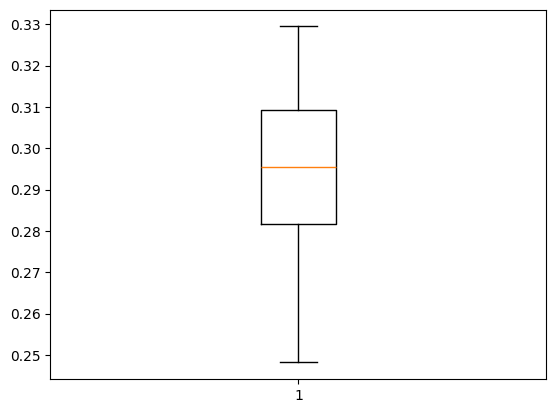

In [28]:
plt.boxplot(list_power)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e0426e14ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0426e162d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0426e14510>],
 'medians': [<matplotlib.lines.Line2D at 0x7e0426e17790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0426e17fd0>],
 'means': []}

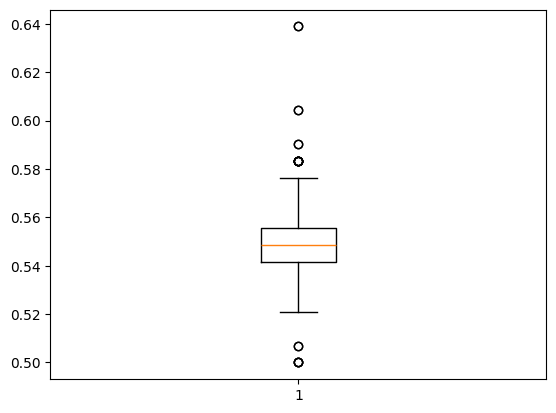

In [29]:
plt.boxplot(list_accuracy)

In [30]:
print(max(list_power))
print(max(list_accuracy))

0.32946298984034833
0.6388888888888888


# Conclusion

Avec ces nouvelles méthodes non linéaires, on a réussi montrer une nouvelle fois la présence d'un changement climatique mais cette fois ci les résultats sont plus fiables et robustes qu'avec les méthodes non linéaires.